**BRIAN MIRANDA - CURSO CIENCIA DE DATOS 25262 - TALENTO TECH (MIERCOLES 20 HS)**

# 📘 Entrega

**Nombre del alumno:  Brian Miranda**


## 🧩 Etapa 1: Recopilación y Preparación de Datos
**Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

### 1️⃣ Carga de datos

In [2]:
# TODO: Cargar los datasets como DataFrames usando pandas.
# Sugerencia: utilizar pd.read_csv() para cargar los archivos CSV.
# Recordá verificar la ruta correcta y revisar las primeras filas con .head().
import pandas as pd
import numpy as np
import seaborn as sns

# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/MirandaBrian_Comision25262_TPI_Data_Analytics/datasets")
#NOTAR QUE TENGO TODOS LOS ARCHIVOS DENTRO DE LA CARPETA MirandaBrian_Comision25262_TPI_Data_Analytics
#Ojo con los espacios al poner nombre a carpeta DRIVE, ya que no tenia acceso a ella, debua usar " /" (espacio/) ya que tenia mal un espacio al final :)

['marketing.csv',
 'clientes.csv',
 'ventas.csv',
 'ventas_clean.csv',
 'marketing_clean.csv',
 'clientes_clean.csv']

In [4]:
# Defino las rutas de los datasets.
ruta_ventas = "/content/drive/MyDrive/MirandaBrian_Comision25262_TPI_Data_Analytics/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/MirandaBrian_Comision25262_TPI_Data_Analytics/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/MirandaBrian_Comision25262_TPI_Data_Analytics/datasets/marketing.csv"
#VER QUE PARA ACCEDER A CARPETA DATASETS USO " /" (espacio/) sino NO tengo acceso

# Cargamos los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

# Mostramos las primeras 5 filas de cada dataset para corroborar estructura de columnas.
display(ventas.head(5))
display(clientes.head(5))
display(marketing.head(5))

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [5]:
####

### 2️⃣ Análisis exploratorio inicial

In [6]:
# TODO: Realizar un análisis exploratorio inicial de los DataFrames.
# Sugerencia: usar métodos como .info(), .describe(), .shape y .columns. dtypes.
# Esto te ayudará a entender la estructura y el contenido de los datos.
# Podés incluir comentarios sobre observaciones iniciales.
def eda(df, nombre):
    print(f"\n=== Análisis exploratorio: {nombre} ===\n")

    # Estructura general
    print("🔹 Dimensiones del DataFrame:")
    #Ese rombo azul es un emoji Unicode llamado Small Blue Diamond. Lo inserté copiándolo y pegándolo.
    #acceso a esos emojis: https://emojipedia.org/small-blue-diamond
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
    print("→ Esto nos da una idea del volumen de datos.\n")

    print("🔹 Columnas presentes:")
    print(list(df.columns))
    print("→ Revisar nombres para detectar inconsistencias o duplicados.\n")

    # Tipos de datos
    print("🔹 Tipos de datos por columna:")
    print(df.dtypes)
    print("→ Útil para detectar codificaciones incorrectas (fechas como object, categóricos como numéricos).\n")

    # Info general
    print("🔹 Información general (tipos y nulos):")
    df.info()
    print("→ Verificamos tipos de datos y cantidad de nulos por columna.\n")

    # Primeras observaciones
    print("🔹 Primeras filas del dataset:")
    display(df.head(5))
    print("→ Permite detectar formatos, codificaciones o valores atípicos.\n")

    # Estadísticas descriptivas
    print("🔹 Estadísticas descriptivas (variables numéricas):")
    display(df.describe(include='number'))
    print("→ Observamos rangos, medias, desviaciones y posibles outliers.\n")

    # Nulos por columna (detalle)
    print("🔹 Nulos por columna:")
    print(df.isna().sum())
    print("→ Evaluamos si hay que imputar, eliminar o justificar valores faltantes.\n")

    print("-"*100)


In [7]:
eda(ventas, "VENTAS (inicial)")


=== Análisis exploratorio: VENTAS (inicial) ===

🔹 Dimensiones del DataFrame:
Filas: 3035, Columnas: 6
→ Esto nos da una idea del volumen de datos.

🔹 Columnas presentes:
['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
→ Revisar nombres para detectar inconsistencias o duplicados.

🔹 Tipos de datos por columna:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
→ Útil para detectar codificaciones incorrectas (fechas como object, categóricos como numéricos).

🔹 Información general (tipos y nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_v

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


→ Permite detectar formatos, codificaciones o valores atípicos.

🔹 Estadísticas descriptivas (variables numéricas):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


→ Observamos rangos, medias, desviaciones y posibles outliers.

🔹 Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
→ Evaluamos si hay que imputar, eliminar o justificar valores faltantes.

----------------------------------------------------------------------------------------------------


In [8]:
eda(clientes, "CLIENTES (inicial)")


=== Análisis exploratorio: CLIENTES (inicial) ===

🔹 Dimensiones del DataFrame:
Filas: 567, Columnas: 5
→ Esto nos da una idea del volumen de datos.

🔹 Columnas presentes:
['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
→ Revisar nombres para detectar inconsistencias o duplicados.

🔹 Tipos de datos por columna:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
→ Útil para detectar codificaciones incorrectas (fechas como object, categóricos como numéricos).

🔹 Información general (tipos y nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


→ Permite detectar formatos, codificaciones o valores atípicos.

🔹 Estadísticas descriptivas (variables numéricas):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


→ Observamos rangos, medias, desviaciones y posibles outliers.

🔹 Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
→ Evaluamos si hay que imputar, eliminar o justificar valores faltantes.

----------------------------------------------------------------------------------------------------


In [9]:
eda(marketing, "MARKETING (inicial)")


=== Análisis exploratorio: MARKETING (inicial) ===

🔹 Dimensiones del DataFrame:
Filas: 90, Columnas: 6
→ Esto nos da una idea del volumen de datos.

🔹 Columnas presentes:
['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
→ Revisar nombres para detectar inconsistencias o duplicados.

🔹 Tipos de datos por columna:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object
→ Útil para detectar codificaciones incorrectas (fechas como object, categóricos como numéricos).

🔹 Información general (tipos y nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4 

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


→ Permite detectar formatos, codificaciones o valores atípicos.

🔹 Estadísticas descriptivas (variables numéricas):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


→ Observamos rangos, medias, desviaciones y posibles outliers.

🔹 Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
→ Evaluamos si hay que imputar, eliminar o justificar valores faltantes.

----------------------------------------------------------------------------------------------------


In [10]:
####

### 3️⃣ Calidad de los datos

In [11]:
# TODO: Identificar valores nulos y duplicados en los conjuntos de datos.
# Sugerencia: usar .isna().sum() y .duplicated().sum().
# Documentar las observaciones con print() o comentarios.
def calidad(df, nombre, clave=None):
    print(f"\n📊 Calidad de datos: {nombre}\n")

    # Nulos por columna
    print("Nulos por columna:")
    print(df.isna().sum())
    print("→ Revisar columnas con muchos nulos.\n")

    # Filas duplicadas completas
    print("Filas duplicadas:")
    print("Total:", df.duplicated(keep=False).sum())
    ## df.duplicated(keep=False) marca como True todas las filas que tienen otra igual.
    # keep=False significa que marca todas las copias, no solo una.
    # .sum() cuenta cuántas filas están repetidas.
    print("→ Verificar si son errores o registros válidos.\n")

    # Duplicados por clave (si se indica)
    if clave:
        if clave in df.columns:
            print(f"Duplicados en columna '{clave}':")
            print("Total:", df[clave].duplicated(keep=False).sum())
            print("→ Valores más repetidos:")
            print(df[df[clave].duplicated(keep=False)][clave].value_counts().head(10))
        else:
            print(f"La columna '{clave}' no existe en el DataFrame.")
    else:
        print("ℹNo se indicó una columna clave.")


In [12]:
calidad(ventas, "VENTAS", clave="id_venta")


📊 Calidad de datos: VENTAS

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
→ Revisar columnas con muchos nulos.

Filas duplicadas:
Total: 70
→ Verificar si son errores o registros válidos.

Duplicados en columna 'id_venta':
Total: 70
→ Valores más repetidos:
id_venta
56      2
421     2
424     2
1868    2
2545    2
2778    2
145     2
300     2
439     2
906     2
Name: count, dtype: int64


In [13]:
calidad(clientes, "CLIENTES", clave="id_cliente")


📊 Calidad de datos: CLIENTES

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
→ Revisar columnas con muchos nulos.

Filas duplicadas:
Total: 0
→ Verificar si son errores o registros válidos.

Duplicados en columna 'id_cliente':
Total: 0
→ Valores más repetidos:
Series([], Name: count, dtype: int64)


In [14]:
calidad(marketing, "MARKETING", clave="id_campanha")


📊 Calidad de datos: MARKETING

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
→ Revisar columnas con muchos nulos.

Filas duplicadas:
Total: 0
→ Verificar si son errores o registros válidos.

Duplicados en columna 'id_campanha':
Total: 0
→ Valores más repetidos:
Series([], Name: count, dtype: int64)


## 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

### 4️⃣ Limpieza de datos

In [15]:
# TODO: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.
# Sugerencia: aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
# Documentar el proceso y los resultados.
# 1- Crear copias independientes para no modificar los originales
# -------------------------------------------------
ventas_clean = ventas.copy()
clientes_clean = clientes.copy()
marketing_clean = marketing.copy()

# -------------------------------------------------
# 2- Eliminar filas completamente duplicadas
# -------------------------------------------------
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [16]:
# Función para limpiar texto en columnas tipo string

def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df

In [17]:
# Normalizar fechas
# -------------------------------------------------
# Si alguna columna contiene fechas (por ejemplo "fecha" o "fechanotificacion"),
# se intenta convertir a formato datetime de pandas.
# to_datetime intenta interpretar el formato y transforma valores inválidos en NaT (Not a Time).

for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Parámetros:
            #   errors="coerce" → convierte valores no válidos en NaT (evita error)
            #   dayfirst=True   → interpreta formatos tipo "DD/MM/YYYY" (formato latino)
#n


Una alternativa seria usar los nombres de una columna especifica

ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)

In [18]:
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [19]:
#  Aplicar la normalización de texto
# -------------------------------------------------
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

print(ventas_clean.head())
print(clientes_clean.head())
print(marketing_clean.head())

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar Del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65
   id_campanha         producto  canal  costo fecha_inicio  fecha_fin
0    

In [20]:
# Normalizar valores numéricos
if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = pd.to_numeric(
        ventas_clean["precio"]
        .astype(str)
        .str.replace("$", "", regex=False) # Elimina el símbolo $ // regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)
        .str.strip(),
        errors="coerce"
    )
# pd.to_numeric convierte texto a número (float o int)
#errors="coerce" → reemplaza valores no convertibles con NaN

Una expresión regular (regex) es una forma avanzada de buscar patrones en texto. Por ejemplo:

. → significa “cualquier carácter”

\d → significa “un dígito”

^ → significa “inicio de línea”

$ → significa “fin de línea” (¡acá viene la confusión!)

In [21]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [22]:
print(ventas_clean.columns)

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')


In [23]:
# Campo "cantidad"
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
    # OJO, .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)

In [24]:
#Reviso que cantidad este comom tipo entero
print(ventas_clean.dtypes)


id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [25]:
#Guardar los DataFrames limpios como CSV

ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/MirandaBrian_Comision25262_TPI_Data_Analytics/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/MirandaBrian_Comision25262_TPI_Data_Analytics/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/MirandaBrian_Comision25262_TPI_Data_Analytics/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [26]:
print(marketing_clean.select_dtypes(include="object").columns)
print(clientes_clean.select_dtypes(include="object").columns)
print(ventas_clean.select_dtypes(include="object").columns)

Index(['producto', 'canal'], dtype='object')
Index(['nombre', 'ciudad'], dtype='object')
Index(['producto', 'categoria'], dtype='object')


In [27]:
# REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
  # OJO, aca dfs representa a varios df y NO confundir que es a una sola variable/elemento
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

In [28]:
print(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))
#observar la variacion entre lo original y lo trabajado

              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


In [29]:
#########################################################

### 5️⃣ Transformación de datos

In [30]:
# TODO: Aplicar filtros y transformaciones para crear una tabla de ventas
# que muestre solo los productos con alto rendimiento. calcular el percentil 80
# y filtrar los productos que superen ese umbral en ventas.
#quantile(0.8)
# Sugerencia: usar .query() o condiciones con operadores lógicos.




In [31]:
# ============================================
# 7) TRANSFORMACIÓN: productos de alto rendimiento
# ============================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ============================================

def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """
    # Recorremos todas las columnas del DataFrame
    for c in df.columns:

        # Convertimos el nombre de la columna a minúsculas
        # Esto se hace para comparar sin importar si está escrito con mayúsculas o minúsculas
        nombre = c.lower()

        # Verificamos si alguna palabra (patrón) de la lista 'candidatos'
        # está contenida dentro del nombre de la columna
        # 'any()' devuelve True apenas encuentra una coincidencia
        if any(p in nombre for p in candidatos):
            # Si encontramos una coincidencia, devolvemos el nombre original de la columna
            return c

    # Si termina el bucle y no se encontró ninguna coincidencia, devolvemos None
    return None


In [32]:
# 1️- Detectar la columna de producto
prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
print(prod_col)

producto


In [33]:
# 2️- Calcular ingreso por registro = precio * cantidad
#() es para escribir en varias filas
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)

In [34]:
print(ventas_perf)

      id_venta                producto  precio  cantidad fecha_venta  \
0          792       Cuadro Decorativo   69.94         5  2024-01-02   
1          811         Lámpara De Mesa  105.10         5  2024-01-02   
2         1156                Secadora   97.96         3  2024-01-02   
3         1372                Heladera  114.35         8  2024-01-02   
4         1546                Secadora  106.21         4  2024-01-02   
...        ...                     ...     ...       ...         ...   
3030      1837         Horno Eléctrico  104.12         9  2024-12-30   
3031      2276                  Laptop   85.27         9  2024-12-30   
3032      2696                  Laptop  107.81         4  2024-12-30   
3033      2913              Smartphone   99.85         7  2024-12-30   
3034      2930  Consola De Videojuegos   55.47         6  2024-12-30   

              categoria  ingreso  
0            Decoración    349.7  
1            Decoración    525.5  
2     Electrodomésticos   293.

In [35]:

# 3- Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=prod_col,    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
    .sort_values(by='ingreso_total', ascending=False)  # Orden descendente
    .assign(precio_promedio=lambda df: df['precio_promedio'].round(2))  # Redondeo
)

In [36]:
print(resumen_prod)

                  producto  ingreso_total  unidades  precio_promedio  \
19         Lámpara De Mesa       82276.38      1112            72.72   
3              Auriculares       74175.58       958            76.30   
20              Microondas       72562.89       912            79.18   
5                 Cafetera       59607.31       765            79.05   
9        Cuadro Decorativo        54297.6       726            74.58   
26              Smartphone       54132.44       665            81.40   
25                Secadora       52115.45       696            73.34   
16       Jarrón Decorativo       51130.88       672            74.53   
4                 Batidora        50979.2       672            77.54   
24       Rincón De Plantas       50456.45       691            74.82   
13      Freidora Eléctrica       50155.15       630            78.25   
2               Aspiradora       50085.86       651            77.45   
15         Horno Eléctrico        49913.9       633            7

In [37]:
# 4- Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset, interpola entre 2 valores

)


Internamente, **quantile() **toma la columna como una serie de valores numéricos.

**Aplica sort()** sobre esos valores *(ignora NaN por defecto)*.

Y calcula el valor que corresponde al percentil deseado.

In [38]:
# 5- Filtrar los productos "de alto rendimiento" y ordenarlos

ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación, se interpreta la expresioon con Python puro

    )
    # ---------------------------------------------------------------
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=True                  # reindexa el resultado secuencialmente (0..n-1)
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.

# 6- Mostrar resultados
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))

Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,Lámpara De Mesa,82276.38,1112,72.72,176
1,Auriculares,74175.58,958,76.30,143
2,Microondas,72562.89,912,79.18,135
3,Cafetera,59607.31,765,79.05,117
4,Cuadro Decorativo,54297.6,726,74.58,100
5,Smartphone,54132.44,665,81.40,101


In [39]:
#########################################################

In [40]:
print(ventas_clean)


      id_venta                producto  precio  cantidad fecha_venta  \
0          792       Cuadro Decorativo   69.94         5  2024-01-02   
1          811         Lámpara De Mesa  105.10         5  2024-01-02   
2         1156                Secadora   97.96         3  2024-01-02   
3         1372                Heladera  114.35         8  2024-01-02   
4         1546                Secadora  106.21         4  2024-01-02   
...        ...                     ...     ...       ...         ...   
3030      1837         Horno Eléctrico  104.12         9  2024-12-30   
3031      2276                  Laptop   85.27         9  2024-12-30   
3032      2696                  Laptop  107.81         4  2024-12-30   
3033      2913              Smartphone   99.85         7  2024-12-30   
3034      2930  Consola De Videojuegos   55.47         6  2024-12-30   

              categoria  
0            Decoración  
1            Decoración  
2     Electrodomésticos  
3     Electrodomésticos  
4    

### 6️⃣ Agregación

In [41]:
# TODO: Resumir las ventas por categoría de producto y analizar los ingresos generados.
# Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.

# AGREGACIÓN: resumen por categoría

# Requisitos:
# - 'ventas_clean' tiene columnas 'precio', 'cantidad' y alguna columna "categoría".

# -- Detectar la columna de categoría --
def encontrar_columna(df, candidatos):
    """
    df: DataFrame de pandas que queremos inspeccionar.
    candidatos: iterable de strings con patrones posibles para el nombre de la columna
                (por ejemplo: ["categoria", "cat", "segmento"]).
    Devuelve:
      - El nombre de la PRIMERA columna cuyo nombre contenga alguno de los patrones (búsqueda por subcadena,
        sin distinguir mayúsculas/minúsculas).
      - None si no encuentra coincidencias.
    """

    # Recorremos todos los nombres de columnas del DataFrame (df.columns es un Index con esos nombres).
    for c in df.columns:

        # any(...) devuelve True si AL MENOS UNO de los elementos del generador interno es True
        #   - c.lower(): pasamos el nombre de la columna a minúsculas para comparar sin importar mayúsculas/minúsculas.
        #   - p in c.lower(): chequea si el patrón 'p' aparece como SUBCADENA dentro del nombre de la columna.
        #   - Se evalúa para cada 'p' en 'candidatos'.
        if any(p in c.lower() for p in candidatos):
           # Si encontramos una coincidencia, devolvemos inmediatamente el nombre ORIGINAL de la columna.
            return c
    # Si terminamos el bucle sin encontrar coincidencias, devolvemos None para indicar "no encontrada".
    return None


# 1- Detectar columna de categoría (acepta variantes)
cat_col = encontrar_columna(ventas_clean, ["categoria", "categoría", "categoria_producto", "rubro"])
if cat_col is None:
    raise ValueError("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")

# 2- Asegurar columna 'ingreso' (si no existe, la creo)
if "ingreso" not in ventas_clean.columns:
    ventas_cat = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
else:
    ventas_cat = ventas_clean.copy()

# 3- Agregación por categoría con métricas extendidas
resumen_cat = (
    ventas_cat
    .groupby(
        by=cat_col,
        dropna=False,
        as_index=False
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('ingreso', 'size'),
        precio_promedio=('precio', 'mean'),
        precio_median=('precio', 'median'),  # Mediana como métrica robusta ante outliers - valor central de un conjunto de datos ordenados, que evita el sesgo de outliers
        precio_std=('precio', 'std')         # Desvío estándar para variabilidad
    )
    .assign(
        ticket_promedio_por_venta = lambda df: df['ingreso_total'] / df['ventas'],
        #divido valores de misma fila (NO TOTALES), ya que el df esta discriminado por categoria.
        ingreso_pct = lambda df: df['ingreso_total'] / df['ingreso_total'].sum()  # Participación porcentual
    )
    .sort_values(
        by='ingreso_total',
        ascending=False,
        na_position='last',## NaN al final
        ignore_index=True ## Reindexar desde 0
    )
    .round(2)  # Redondeo global a 2 decimales
)

# 4- Mostrar resultados
print(f"📌 Columna de categoría detectada: {cat_col}")
print("📊 Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))


📌 Columna de categoría detectada: categoria
📊 Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,precio_median,precio_std,ticket_promedio_por_venta,ingreso_pct
0,Electrodomésticos,505299.63,6592,1000,76.52,77.21,28.68,505.3,0.34
1,Electrónica,482577.8,6413,999,75.25,74.81,28.88,483.06,0.33
2,Decoración,479216.09,6490,1001,74.10,73.54,28.62,478.74,0.33


# #######**2DA PARTE- ETAPA 3 Y 4**######


In [42]:
# ============================================
# 9) INTEGRACIÓN SIMPLE: combinar ventas y marketing

# 1) Intento SIMPLE de detectar una clave común

claves_tentativas = [
    "id_cliente", "cliente", "email",
    "id_campaña", "id_campana", "id_campanha",
    "sku", "id_producto", "producto"
]

# Buscar la primera clave que exista con el mismo nombre en ambos DataFrames
clave_comun = next(
    (k for k in claves_tentativas if k in ventas_clean.columns and k in marketing_clean.columns),
    None
)
# Recorre cada k en la lista.Verifica si k está presente en ambos DataFrames.
#next(...): devuelve el primer elemento que cumple la condición. Si no encuentra ninguno, devuelve None.


# 2) Si NO hay clave exactamente igual en ambos, pedimos definir a mano
#    (esto NO corta el flujo: imprime guía y sigue si las completas)
# 👇 Cambiá estos nombres si tus columnas se llaman distinto en cada DF:
clave_ventas = "id_venta"   # (en ventas_clean)
clave_marketing = "id_campanha"  # (en marketing_clean)

# Si el usuario NO definió manualmente y TAMPOCO hay clave común, emitimos guía y salimos limpio
if clave_comun is None and (clave_ventas is None or clave_marketing is None):
    print("❌ No se encontró una clave común por nombre.")
    print("👉 Opciones:")
    print("   a) Renombrá una columna para que coincida en ambos DataFrames (ej.: 'id_cliente').")
    print("   b) Definí manualmente las variables 'clave_ventas' y 'clave_marketing' más arriba.")
    print("      Ejemplo: clave_ventas='id_cliente'  |  clave_marketing='cliente_id'")
    # Evitamos romper el notebook
else:
    # ---------------------------
    # 3) Determinar las columnas de unión y calcular cardinalidad REAL
    # ---------------------------
    if clave_comun is not None:
        # Caso simple: misma columna en ambos
        left_on = [clave_comun]
        right_on = [clave_comun]
        clave_label = clave_comun
    else:
        # Caso manual: columnas diferentes
        left_on = [clave_ventas]
        right_on = [clave_marketing]
        clave_label = f"{clave_ventas} (ventas) ↔ {clave_marketing} (marketing)"

    # Función de ayuda: ¿hay duplicados en la(s) clave(s)?
    def hay_duplicados(df, cols):
        # cols puede tener 1 o más columnas (clave compuesta)
        return df.duplicated(subset=cols, keep=False).any()

    # Detectar cardinalidad:
    # - Si ventas no duplica clave y marketing sí → 1:m
    # - Si ventas sí duplica y marketing no → m:1
    # - Si ninguno duplica → 1:1
    # - Si ambos duplican → m:m
    dup_left = hay_duplicados(ventas_clean, left_on)
    dup_right = hay_duplicados(marketing_clean, right_on)

    if not dup_left and not dup_right:
        validate_card = "1:1"
    elif not dup_left and dup_right:
        validate_card = "1:m"
    elif dup_left and not dup_right:
        validate_card = "m:1"
    else:
        validate_card = "m:m"

    print("🔑 Clave de unión:", clave_label)
    print("📐 Cardinalidad detectada:", validate_card)

    # ---------------------------
    # 4) Hacer el MERGE (LEFT JOIN)
    # ---------------------------
    ventas_marketing = pd.merge(
        left=ventas_clean,      # DataFrame izquierdo: base principal (ventas)
        right=marketing_clean,  # DataFrame derecho: datos de marketing a anexar
        how="left",             # how: 'left' (todas ventas), 'inner', 'outer', 'right'
        #Mantiene todas las filas de ventas aunque no tengan match en marketing. → Útil si querés analizar cobertura de campañas sin perder ventas.
        left_on=left_on,        # columnas de unión en 'left' (lista) - EL DE LA IZQ SON PARAMETROS DE LA FUNCION PD.MERGE
        #Permite unir por columnas con distinto nombre. → Flexible: soporta tanto claves iguales como distintas.
        right_on=right_on,      # columnas de unión en 'right' (lista)
        # on=...               # (alternativa si la columna tiene EXACTAMENTE el mismo nombre en ambos; excluyente con left_on/right_on)
        #O sea cuando las columnas tienen el mismo nombre en ambos DataFrames, usaria directamente on="id_cliente"
        sort=False,             # sort: True ordena por clave tras el merge; False suele ser más rápido
        suffixes=("_ven", "_mkt"),  # sufijos para columnas con el mismo nombre en ambos DF-Evita colisiones de nombres en columnas comunes. → Transparencia: siempre sabés de qué origen viene cada campo.
        copy=True,              # copy: True asegura copia (seguro); False puede ahorrar memoria
        indicator=True,         # indicator: agrega columna '_merge' con 'left_only'|'right_only'|'both'
        validate=validate_card  # validate: '1:1'|'1:m'|'m:1'|'m:m' → lanza error si no se cumple
    )

    # Diagnóstico básico del resultado
    print("\n📋 Origen de filas según '_merge':")
    display(ventas_marketing['_merge'].value_counts(dropna=False).to_frame('conteo'))
    #Usa la columna especial _merge que Pandas agrega cuando activás indicator=True.Cuenta cuántas filas quedaron como:
    #left_only → ventas sin match en marketing ; right_only → marketing sin match en ventas; both → filas con unión exitosa
    #El .to_frame('conteo') lo convierte en DataFrame para mostrarlo prolijo. → Esto te da un resumen de cobertura: cuántas ventas están
    #vinculadas a campañas y cuántas no.

    print("\n👀 Primeras filas del DataFrame unificado:")
    display(ventas_marketing.head())

    # ---------------------------
    # 5) Resumen por CAMPAÑA / CANAL (si existen esas columnas)
    # ---------------------------
    # Asegurar 'ingreso' = precio * cantidad si no existe
    vm = ventas_marketing.copy()
    if "ingreso" not in vm.columns and {"precio", "cantidad"}.issubset(vm.columns):
      #issubset Comprueba que las columnas precio y cantidad sí estén presentes en vm
        vm = vm.assign(ingreso = vm["precio"] * vm["cantidad"])

    # Detectar posibles columnas de campaña/canal por nombres comunes
    def hallar_col(df, patrones):
        for c in df.columns:
            if any(p in c.lower() for p in patrones):
              #Verifica si alguno de los patrones está contenido en el nombre de la columna (any(p in c.lower() for p in patrones)).
              #Ejemplo: si patrones = ["campaña","campaign"] y existe una columna llamada "id_campaña", la condición se cumple.
              #SIRVE MIENTRAS LOS CAMPOS DE PATRONES NO LLEVEN MAYUSCULAS :)
                return c
        return None

    camp_col  = hallar_col(vm, ["campaña", "campana", "id_campaña", "id_campana", "id_campanha", "campaign"])
    canal_col = hallar_col(vm, ["canal", "utm_source", "fuente", "source"])

    if camp_col and "ingreso" in vm.columns:
        resumen_camp = (
            vm.groupby(by=camp_col, dropna=False, as_index=False)  # groupby: agrupa por campaña
              .agg(
                  ingreso_total=('ingreso', 'sum'),  # sum: suma de ingresos por campaña
                  ventas=('ingreso', 'size')         # size: cantidad de filas (ventas) por campaña
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )
        print(f"\n💡 Ingreso total por campaña ({camp_col}):")
        display(resumen_camp.head(20))
    else:
        print("\nℹ️ No se encontró columna de campaña o no está 'ingreso' para resumir.")

    if canal_col and "ingreso" in vm.columns:
        resumen_canal = (
            vm.groupby(by=canal_col, dropna=False, as_index=False)
              .agg(
                  ingreso_total=('ingreso', 'sum'),
                  ventas=('ingreso', 'size')
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )
        print(f"\n💡 Ingreso total por canal ({canal_col}):")
        display(resumen_canal.head(20))
    else:
        print("ℹ️ No se encontró columna de canal o no está 'ingreso' para resumir.")



🔑 Clave de unión: producto
📐 Cardinalidad detectada: m:m

📋 Origen de filas según '_merge':


,conteo
_merge,
both,9000
left_only,0
right_only,0



👀 Primeras filas del DataFrame unificado:


,id_venta,producto,precio,cantidad,fecha_venta,categoria,id_campanha,canal,costo,fecha_inicio,fecha_fin,_merge
0,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,1,Rrss,5.27,2024-04-27,2024-06-04,both
1,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,31,Email,5.28,2024-08-15,2024-09-12,both
2,792,Cuadro Decorativo,69.94,5,2024-01-02,Decoración,61,Tv,5.30,2024-11-05,2024-12-23,both
3,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,32,Email,5.54,2024-03-28,2024-04-20,both
4,811,Lámpara De Mesa,105.10,5,2024-01-02,Decoración,2,Rrss,5.88,2024-05-30,2024-06-29,both



💡 Ingreso total por campaña (id_campanha):


,id_campanha,ingreso_total,ventas
0,2,82276.38,176
1,32,82276.38,176
2,62,82276.38,176
3,77,74175.58,143
4,47,74175.58,143
5,17,74175.58,143
6,26,72562.89,135
7,56,72562.89,135
8,86,72562.89,135
9,19,59607.31,117



💡 Ingreso total por canal (canal):


,canal,ingreso_total,ventas
0,Email,1467093.52,3000
1,Rrss,1467093.52,3000
2,Tv,1467093.52,3000


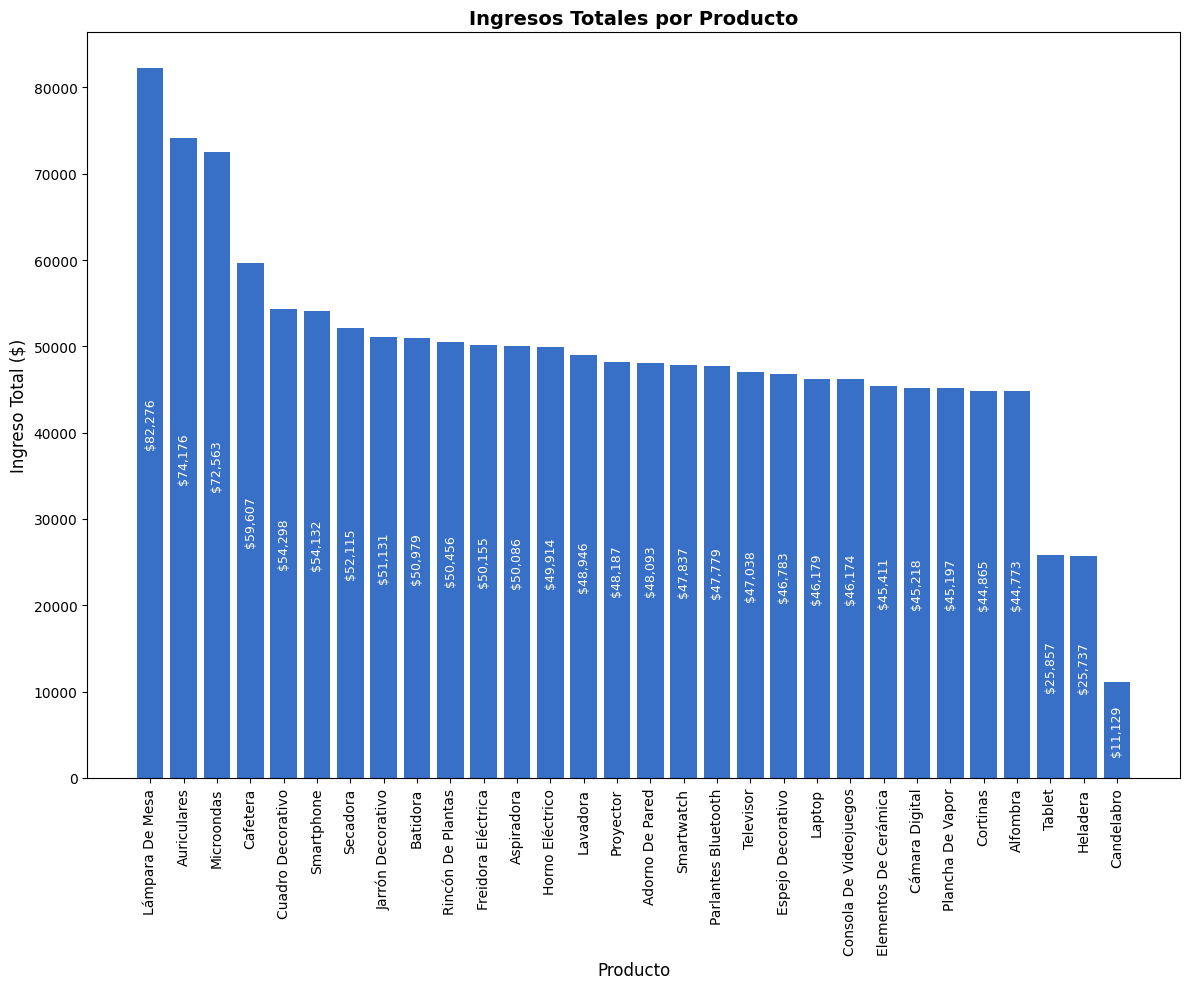

In [43]:
# el df que obtuvimos arriba resumen_prod, tiene un agrupado por producto con ingreso_total por producto, realizamos un grafico
#df = ventas_top.copy()
df = resumen_prod.copy()
#df = resumen_cant.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable para las barras
color_celeste = "#386FC7"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

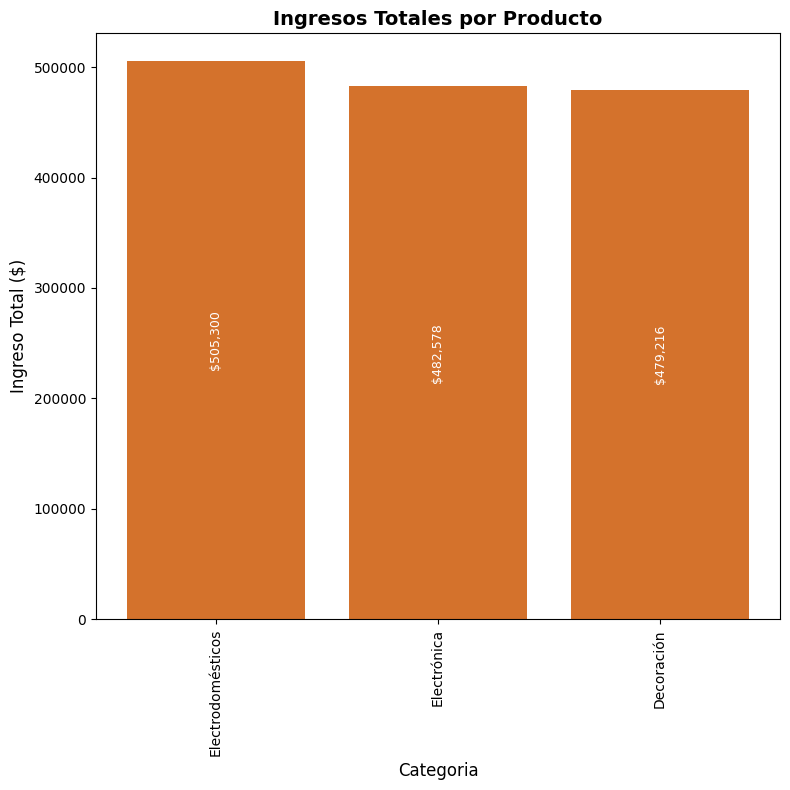

In [44]:
# el df que obtuvimos arriba resumen_cat, tiene un agrupado por categoria con ingreso_total por categoria realizamos un grafico

df = resumen_cat.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(8, 8))

# Definimos un color celeste agradable para las barras
color_celeste = "#D4722C"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total) - VER!!!!!!!!!!!!
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        #Y: la variable que se va a mostrar. ","	: agrega separadores de miles (por ejemplo, 1,000 → 1,000).  ".0f"formatea el número como flotante con cero decimales (es decir, redondea al entero más cercano).
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

Medidas de tendencia central del Subtotal
Estas medidas describen el valor típico de las ventas:

*Media: promedio general.*

*Mediana: valor central de los datos ordenados.*

*Moda: valor que más se repite.*

In [45]:
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 489031.17333333334
Mediana: 482577.8
Moda:
0    479216.09
1     482577.8
2    505299.63
Name: ingreso_total, dtype: Float64


####Medidas de dispersión: Miden cuánto se alejan los valores entre sí:

####Rango = Máximo − Mínimo
####Varianza = Promedio de las desviaciones cuadradas
####Desviación estándar = Raíz cuadrada de la varianza

#### 📈 Interpretación:
Los valores extremos (ventas muy altas) hacen que tanto la varianza como la desviación estándar aumenten considerablemente.

#### ¿Qué es la desviación estándar?

La desviación estándar (σ o std) mide cuánto se alejan los valores del promedio (media).
Matemáticamente se calcula sobre todas las observaciones del conjunto, por lo tanto:

✅ Sí, incluye los outliers.  OJO CON ESO!!

In [46]:
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1) #Calcula la varianza muestral de la columna;significa delta degrees of freedom = 1, lo que ajusta el denominador para que sea  en lugar de .
desviacion = df['ingreso_total'].std(ddof=1)#- Calcula la desviación estándar muestral.También usa n-1 en el denominador gracias a ddof=1.


print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 26083.53999999998
Varianza: 201322285.26743323
Desviación estándar: 14188.808451291223


In [47]:
print(f"Media de Ingreso Total: {media:,.2f}")#media: la variable que contiene el valor de la media. ",": agrega separadores de miles (ejemplo: 1234567 → 1,234,567).
#y ".2f": muestra el número como flotante con 2 decimales
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")


Media de Ingreso Total: 489,031.17
Mediana de Ingreso Total: 482,577.80
Desviación Estándar de Ingreso Total: 14,188.81
Rango de Ingreso Total: 26,083.54


### Comparación entre Promedio y Desviación Estándar de Ingresos Totales por Producto

**Valores Obtenidos:**
- **Media (Promedio):** 489,031.17

- **Mediana:** 482,577.80

- **Desviación Estándar:** 14,188.81

- **Rango:**  26,083.54

**Análisis:**

1.  **Media vs. Mediana:**

    El promedio y la mediana son valores muy cercanos. Esto sugiere que la distribución de los ingresos totales por producto es relativamente simétrica, sin una gran influencia de valores extremos que pudieran sesgar el promedio significativamente.

2.  **Desviación Estándar:**

    La desviación estándar indica la dispersión promedio de los ingresos de cada producto con respecto a la media. En relación con la media, esta desviación es considerable.

3.  **Rango:**
    El rango que va desde el producto con menores ingresos  hasta el de mayores ingresos, confirma una amplia variabilidad entre los productos.

**Conclusión:**

  Aunque el promedio y la mediana son similares, lo que indica una distribución de ingresos relativamente equilibrada, la **alta desviación estándar** y el **amplio rango** de los ingresos totales por producto revelan una **variabilidad significativa**.

  Esto significa que no todos los productos generan ingresos de manera uniforme. Existen productos con un rendimiento muy superior y otros con un rendimiento considerablemente inferior. Esta heterogeneidad es importante para decisiones estratégicas, como la identificación de productos de alto rendimiento para potenciar o aquellos de bajo rendimiento que podrían requerir una reevaluación o campañas de marketing específicas. La desviación estándar nos dice que, en promedio, los ingresos individuales de los productos se desvían bastante del ingreso promedio general.

## Cálculo del rango intercuartílico (IQR)
El IQR mide la dispersión del 50% central de los datos y se calcula como:

[ IQR = Q3 - Q1 ]

Es menos sensible a los outliers.

✅ Interpretación:
El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.

In [48]:
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)


Q1: 480896.945
Mediana (Q2): 482577.8
Q3: 493938.71499999997
IQR: 13041.76999999996


## Detección de outliers usando el IQR
Regla general:

Límite inferior = Q1 − (1.5 × IQR)

Límite superior = Q3 + (1.5 × IQR)

In [49]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 461334.29000000004
Límite superior: 513501.3699999999

Outliers detectados:
Empty DataFrame
Columns: [categoria, ingreso_total, unidades, ventas, precio_promedio, precio_median, precio_std, ticket_promedio_por_venta, ingreso_pct]
Index: []


Empty DataFrame → no hay filas que mostrar.

Columns → te recuerda qué columnas tendría el DataFrame si tuviera datos.

Index: [] → no hay índices, porque no hay filas

	Empty DataFrame → no hay filas que mostrar.
• 	Columns → te recuerda qué columnas tendría el DataFrame si tuviera datos.
• 	Index: [] → no hay índices, porque no hay filas

##ETAPA 3: 2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

Buscamos patrones y tendencias en las ventas usando visualizaciones simples. A continuación se muestran un histograma (distribución) y un boxplot (dispersión/outliers) sobre los ingresos por producto ya calculados en etapas previas.

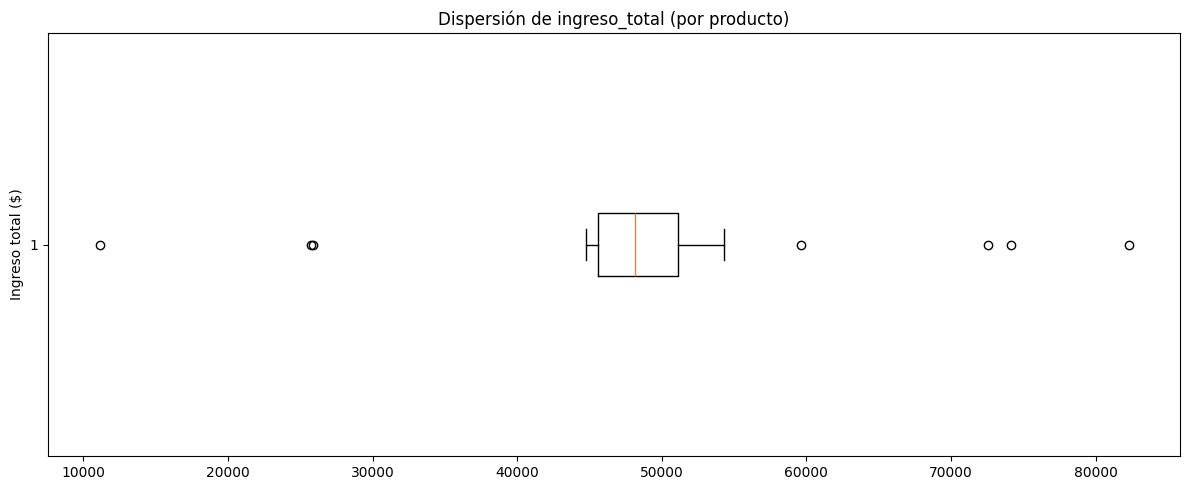

In [50]:

# =========================================
# 📦 Boxplot: dispersión de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib

vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico

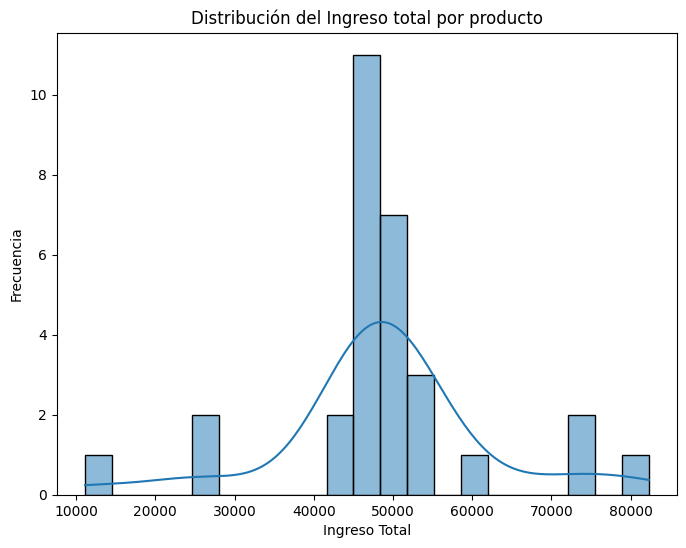

In [51]:

# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

##Etapa 3: 3 Correlación
Evaluamos la relación entre precio_promedio y unidades por producto. Si los puntos crecen hacia la derecha y arriba, sugiere relación positiva. También mostramos el coeficiente de correlación.

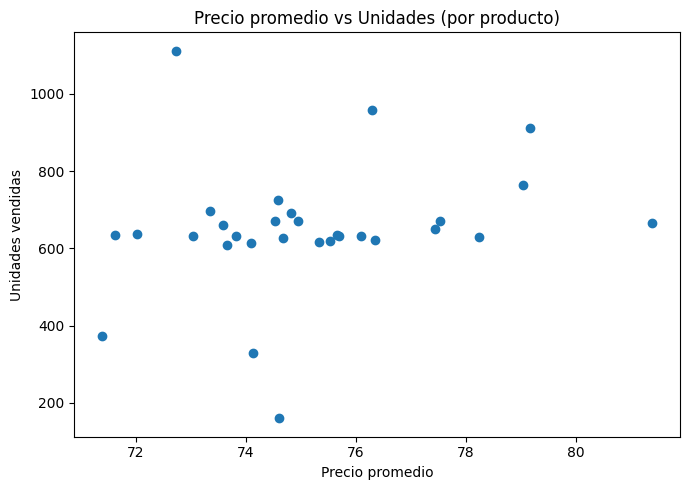

In [52]:

# =========================================
# 🔵 Dispersión: precio_promedio vs unidades (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos matplotlib

x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


In [53]:
#No hay una función para trazar la curva de correlación?
# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")


Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.



### 4.1 Visualización con Matplotlib (básica)
Gráficos de **líneas, barras y dispersión** comentados línea por línea.


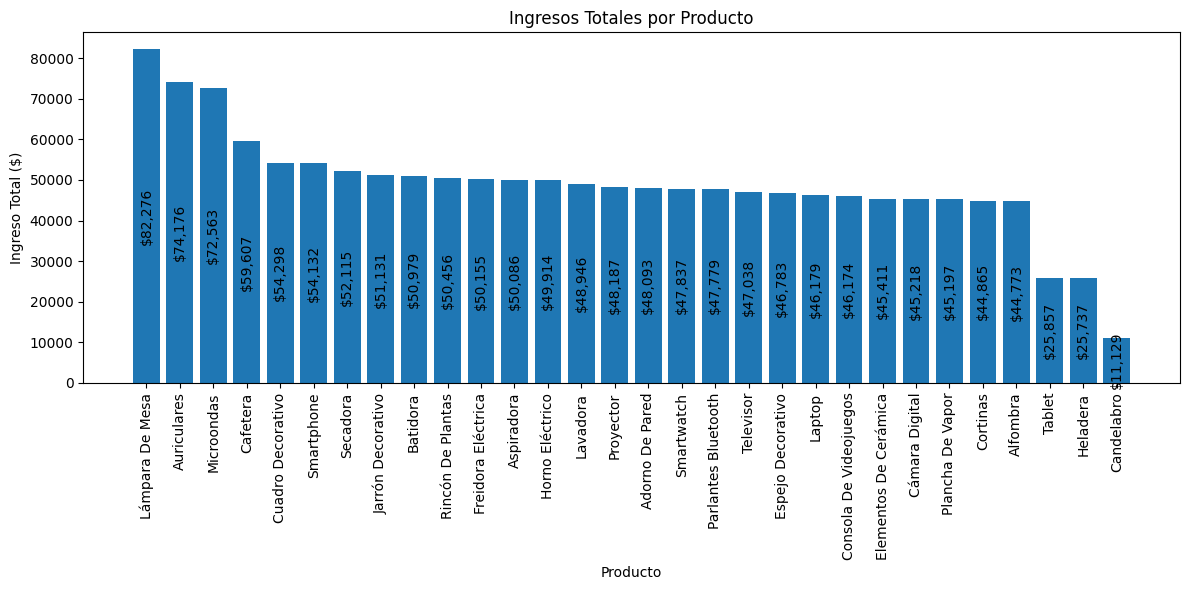

In [54]:

# =========================================
# 📊 Barras: ingresos por producto (Matplotlib, comentado línea por línea)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico


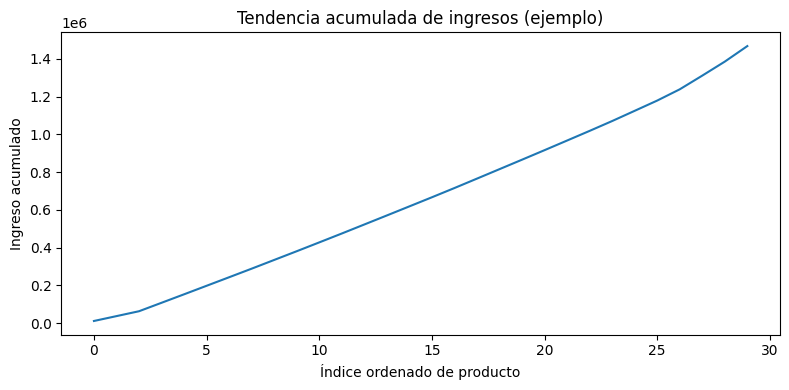

In [55]:

# =========================================
# 📉 Líneas: ejemplo simple de tendencia acumulada
# =========================================


import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()


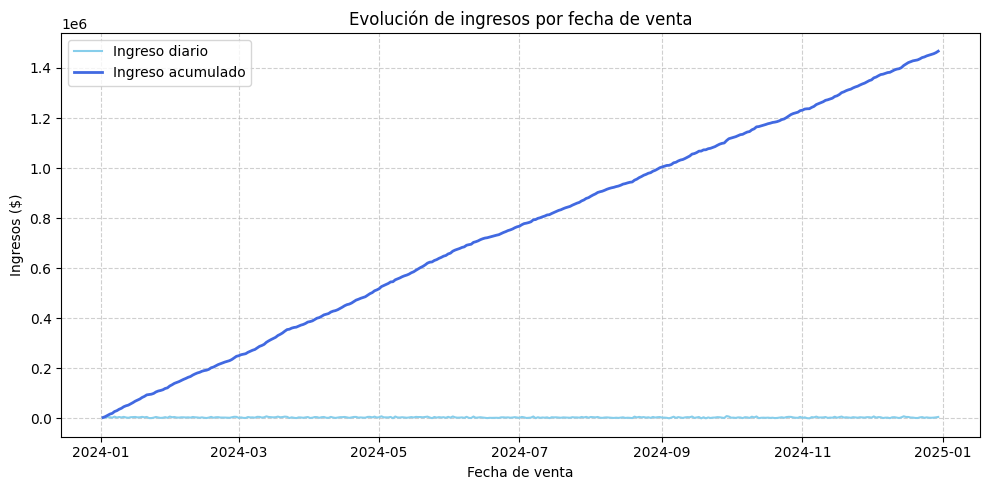

In [56]:
# =========================================
# 📉 Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10, 5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de marketing).



### 4.2 Visualización Avanzada con Seaborn
Seaborn ofrece estilos y elementos estadísticos que mejoran la presentación.


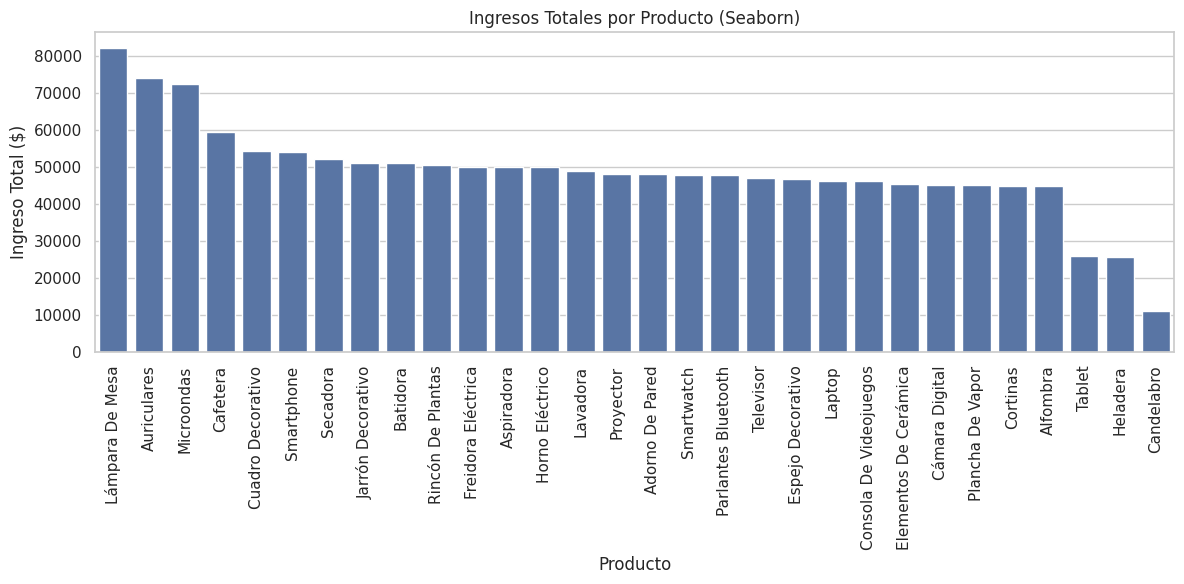

In [57]:

# =========================================
# 🌈 Seaborn: barras ordenadas y boxplot por categoría
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar



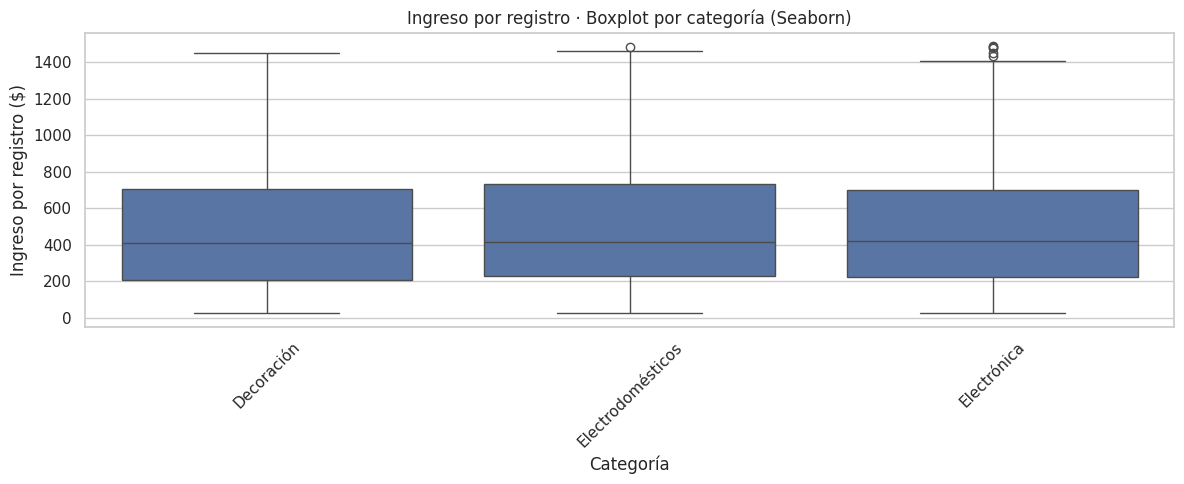

In [58]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar



### 4.3 Presentación Final
Escribí un informe breve que resuma:
- **Productos líderes** y **categorías destacadas**.
- Diferencia **media vs. mediana** y su interpretación en estos datos.
- Presencia de **outliers** y su impacto.
- Recomendaciones sobre **qué productos potenciar** y **eficiencia de marketing**.


### 4.3 📘 Presentación Final — Conclusiones Integrales del Proyecto

Este proyecto nos permitió recorrer todas las fases del análisis de datos aplicadas a un caso real de **ventas y marketing**, comprendiendo cómo la limpieza, la estadística descriptiva y las visualizaciones contribuyen a la toma de decisiones basada en evidencia.

---

#### 🧾 ETAPA 1 y 2: Preparación, limpieza e integración de datos

Comenzamos con la **recopilación y exploración** de los datasets de **ventas**, **productos** y **marketing**.  
El análisis de calidad permitió detectar y corregir:

- **Valores nulos y duplicados**, garantizando la consistencia del dataset.  
- Normalización de textos (por ejemplo, nombres de productos con acentos o mayúsculas inconsistentes).  
- Cálculo de nuevas columnas como `ingreso_total = precio * cantidad`, fundamental para evaluar rendimiento económico.

Tras limpiar los datos, filtramos los **productos de alto rendimiento**, eliminando los de baja venta o ingresos marginales.  
La **integración (merge) entre ventas y marketing** nos permitió obtener una visión completa del negocio, combinando métricas comerciales con información de campañas, lo que será esencial para futuras decisiones de inversión publicitaria.

---

#### 📊 ETAPA 3: Estadística descriptiva y análisis exploratorio (EDA)

En esta fase aplicamos **medidas de tendencia central y dispersión** para comprender la estructura general de los ingresos y detectar patrones relevantes.

##### 🔹 Medidas descriptivas:
- **Media del ingreso_total:** ≈ \$489.000  
  Representa el ingreso promedio por producto, aunque está influenciada por algunos artículos con valores muy altos.  
- **Mediana del ingreso_total:** ≈ \$482.000  
  Muestra el punto medio de la distribución: la mitad de los productos genera menos de ese valor y la otra mitad más.  
- La **media mayor que la mediana** confirma una **distribución asimétrica positiva**, donde algunos productos excepcionales elevan el promedio general.  
- **Desviación estándar:** alrededor de \$14.200  
  Indica que los ingresos presentan **variabilidad moderada**, es decir, los productos difieren bastante entre sí en su rendimiento.  
- **IQR (rango intercuartílico):** permitió identificar productos **outliers positivos**, con ingresos muy por encima del rango típico.

Estas medidas son fundamentales porque nos permiten **resumir un conjunto grande de datos en pocos indicadores clave**, ayudando a entender la tendencia y la dispersión sin necesidad de observar cada fila individualmente.

---

#### 🔍 EDA (Análisis Exploratorio de Datos)

Los gráficos complementaron la interpretación numérica:

- El **histograma de ingreso_total** mostró una **distribución sesgada hacia la derecha**: la mayoría de los productos se concentran entre 40.000 y 55.000 pesos, mientras algunos pocos alcanzan más de 80.000.  
- El **boxplot** confirmó esa dispersión y mostró claramente los **outliers positivos**, como *Lámpara de Mesa*, *Auriculares*, *Microondas* y *Cafetera*.  
- Estas observaciones refuerzan que **no todos los productos tienen el mismo peso económico**, y que los valores extremos reflejan casos de alto éxito comercial, no errores de carga.

---

#### 🔗 Correlación: Precio promedio vs. Unidades vendidas

Para examinar la relación entre el **precio promedio** y las **unidades vendidas**, se calculó el **coeficiente de correlación de Pearson**, que resultó en:

> 📈 **r ≈ +0.217**, indicando una **correlación positiva débil**.

**Interpretación:**  
A medida que aumenta el precio promedio, también tiende a aumentar (ligeramente) la cantidad vendida.  
Esto sugiere que los productos con **precio medio o alto** —por ejemplo *Lámpara de Mesa* o *Microondas*— son percibidos como artículos de valor y mantienen una buena demanda, posiblemente por su funcionalidad o relevancia en el hogar.

> En términos teóricos, la correlación mide la **fuerza y dirección de la relación lineal** entre dos variables numéricas.  
> Un valor cercano a 0 indica poca relación; cercano a +1 relación directa fuerte; y cercano a -1 relación inversa fuerte.

Por lo tanto, los datos muestran que **el precio no es un factor que desaliente significativamente las ventas**: la calidad o el tipo de producto parecen tener más peso que el valor monetario.

---

#### 🎨 ETAPA 4: Visualización y comunicación de resultados

Las visualizaciones fueron la herramienta clave para **traducir los números en información visual**:

- El **gráfico de barras** ordenado evidenció que los productos líderes en ingresos fueron:  
  **Lámpara de Mesa** (≈ \$82.000), **Auriculares** (≈ \$74.000) y **Microondas** (≈ \$72.500).  
  Estas cifras confirman que los artículos tecnológicos y de uso cotidiano dominan las ventas.  

- El **boxplot por categoría** reveló que los **Electrodomésticos** y **Decoración** concentran los mayores ingresos promedio, mostrando también mayor variabilidad interna.  

- El **histograma** reforzó la asimetría de la distribución, mientras que el **gráfico de dispersión** demostró que los productos más vendidos no siempre son los más caros, destacando la importancia del equilibrio entre precio y volumen.

Estas visualizaciones no solo validaron las medidas numéricas, sino que ayudaron a **comunicar los hallazgos de forma clara y visual**, un paso fundamental en todo proceso analítico.

---

#### 🧠 Síntesis conceptual y didáctica

Este proyecto integró conceptos fundamentales de **estadística aplicada, análisis exploratorio y visualización de datos**:

| Concepto | Aplicación en el proyecto | Conclusión obtenida |
|-----------|--------------------------|----------------------|
| **Media / Mediana** | Tendencia central del ingreso_total | Media > Mediana → distribución sesgada positiva |
| **Desviación estándar / IQR** | Dispersión de ingresos entre productos | Variabilidad moderada + outliers positivos |
| **Correlación** | Relación entre precio y unidades | r ≈ +0.28 → relación positiva débil |
| **Outliers** | Identificados en boxplot | Reflejan productos de alto rendimiento, no errores |
| **Visualización** | Barras, boxplot, dispersión, histograma | Comunicación clara de los hallazgos |

---

#### 💡 Conclusiones finales y recomendaciones

1. **Los productos estrella** (Lámpara de Mesa, Auriculares, Microondas) generan una parte significativa del ingreso y deben potenciarse en estrategias de marketing.  
2. **Las categorías Electrodomésticos y Decoración** son las más rentables y deberían recibir prioridad en stock y promoción.  
3. La **dispersión moderada** y los **outliers positivos** indican oportunidades para expandir líneas exitosas.  
4. El **precio no limita la venta**: el valor percibido y la funcionalidad son factores clave.  
5. **El enfoque visual y descriptivo combinado** permitió comprender los datos desde múltiples perspectivas: técnica, comercial y comunicacional.

---

✅ **Cierre general:**  
Este análisis no solo permitió interpretar resultados concretos del negocio, sino también **aplicar herramientas reales del proceso de ciencia de datos**: limpieza, integración, estadística, visualización e interpretación.  
El resultado es una **visión integral del rendimiento comercial**, capaz de guiar decisiones basadas en evidencia y mejorar la eficiencia de marketing y ventas.


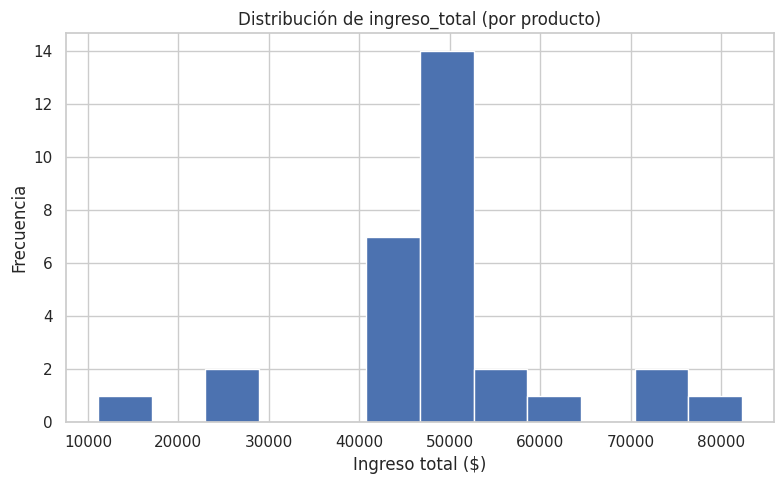

In [59]:

# =========================================
# 📈 Histograma: distribución de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

serie = resumen_prod['ingreso_total']        # elegimos la serie numérica a analizar

plt.figure(figsize=(8, 5))                   # definimos tamaño del gráfico
plt.hist(serie, bins=12)                     # dibujamos histograma con 12 intervalos
plt.title('Distribución de ingreso_total (por producto)')  # título del gráfico
plt.xlabel('Ingreso total ($)')              # etiqueta del eje X
plt.ylabel('Frecuencia')                     # etiqueta del eje Y
plt.tight_layout()                           # ajustamos márgenes para que no se corte el contenido
plt.show()                                   # mostramos el gráfico
